<a href="https://colab.research.google.com/github/cslearning20xx/exploration/blob/master/Particle_Swarm_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Install pyswarm if not already installed
#pip install pyswarm

In [0]:
import pyswarm
from pyswarm import pso

# function to optimize
def banana(x):
    x1 = x[0]
    x2 = x[1]
    return x1**4 - 2*x2*x1**2 + x2**2 + x1**2 - 2*x1 + 5

# optimization constraints
def con(x):
    x1 = x[0]
    x2 = x[1]
    return [-(x1 + 0.25)**2 + 0.75*x2]

# define some lower and upper bound
lb = [-3, -1]
ub = [2, 6]

# the outputs are 1. optimal input values 2. optimal objective value
xopt, fopt = pso(banana, lb, ub, f_ieqcons=con)

# Optimum should be around x=[0.5, 0.76] with banana(x)=4.5 and con(x)=0
print(xopt)
print(fopt)


Stopping search: Swarm best objective change less than 1e-08
[0.50007812 0.75015629]
4.500000042400557


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
def get_intial_position(numparticles = 20, dimension =2, lowerbound = [-4, -4 ], upperbound = [ 4, 4]):
  Current_Position = [ [ np.random.uniform( lowerbound[d], upperbound[d]) for d in range(dimension) ] for i in range(numparticles)] 
  Current_Position = [ np.array(x) for x in Current_Position]
  return Current_Position

In [0]:
def mypso( optfunc, numparticles = 20, dimension =2, lowerbound = [0, 0 ], upperbound = [ 6, 6], maxiter = 20, c1 = 2, c2= 2):
  # Initialize position as a uniform vector of length number of dimensions and bounds as given by lower and upper bound
  
  Current_Position = get_intial_position(numparticles, dimension, lowerbound, upperbound )

  Individual_Best_Position = Current_Position
  Individual_Best_Value = [ optfunc(x) for x in Current_Position]

  # Initialize with zero velocity
  Individual_velocity = [ [0 for d in range(dimension)] for i in range(numparticles) ]

  Global_Best_Position = Current_Position[np.argmin(Individual_Best_Value)]
  Global_Best_Value = min(Individual_Best_Value)
  
  Output_Global_Best_Values = []
  Output_Global_Best_Positions = []

  Itercount = 0
  Convergence = False
  while Itercount < maxiter and Convergence == False:
    for particle in range(numparticles):
      Current_Value = optfunc( Current_Position[particle])

      if Current_Value <= optfunc(Individual_Best_Position[particle]):
        Individual_Best_Position[particle] = Current_Position[particle]
        Individual_Best_Value[particle] = Current_Value
      
      if Current_Value <= optfunc(Global_Best_Position):
        Global_Best_Position = Current_Position[particle]
        Global_Best_Value = Current_Value
      
      X1 = c1 * ( Individual_Best_Position[particle] - Current_Position[particle] )
      X2 = c2 * ( Global_Best_Position - Current_Position[particle] )
      Individual_velocity[particle] = Individual_velocity[particle] +  X1 + X2

      Current_Position[particle] = 0.5 *Current_Position[particle]  + Individual_velocity[particle]
    Itercount = Itercount + 1
    Output_Global_Best_Values.append(Global_Best_Value)  
    Output_Global_Best_Positions.append(Global_Best_Position)  

  return { "Global Best Values": Output_Global_Best_Values, "Global Best Positions": Output_Global_Best_Positions }


[4.08027772 1.91423219] ---> -0.0182748721592055
[0.45115148 5.03223868] ---> -5.69768706393191e-06
[4.76748204 3.17612494] ---> 0.003908730752852446
[2.13751899 4.28529783] ---> -0.021937214826619863
[4.5666277  0.03591659] ---> 1.2331700150936925e-06


Text(0.5, 1.0, 'Function Value with Iterations')

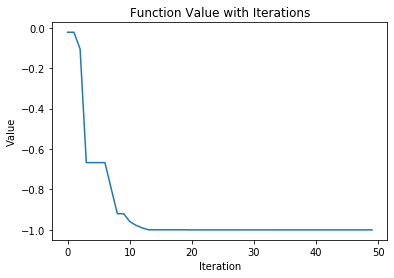

In [0]:
output = mypso( optfunc = easom, numparticles = 5, maxiter = 50)

plt.plot(output['Global Best Values'])
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Function Value with Iterations')